# To be, or not to be
Shakespeare data classification

This notebook deals with classification of Shakespeare Plays.

Key Steps:

Data Preprocessing : Loading data into data frame, filtering required columns, removing null values

Data Transformation: Using Label Encoding (scikit learn) and One Hot Encoding to encode the object data type columns to integer type

Training & Testing Data set

Classification models (scikit learn): Decision Trees, Logistic Regression,K-nearest Neighbours

Data Source:

https://www.kaggle.com/kingburrito666/shakespeare-plays

References:

http://pbpython.com/categorical-encoding.html
http://contrib.scikit-learn.org/categorical-encoding/
https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2


Google Facet:
To find categorical features
/reports/Google_facet_Proj2.png

In [1]:
#importing library and creating dataframes
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Shakespeare_data.csv")
df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


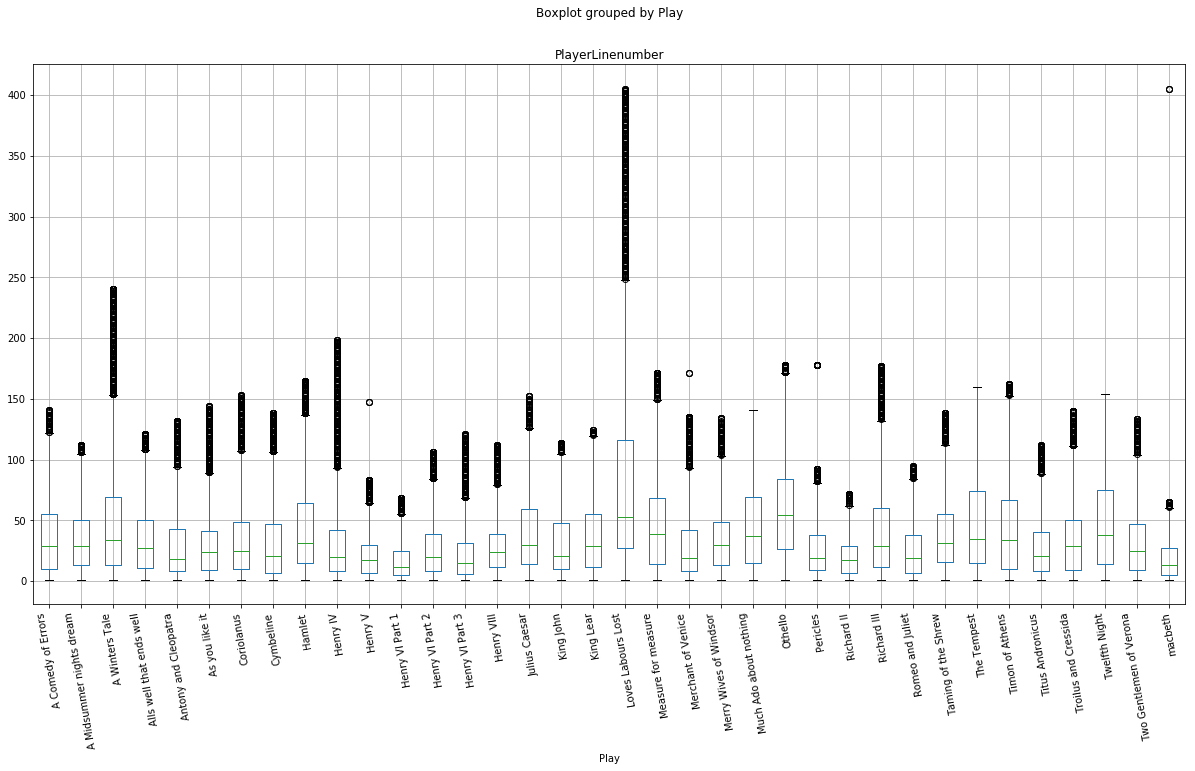

In [2]:
df.boxplot('PlayerLinenumber','Play',rot = 100,figsize=(20,10))

In [3]:
#Finding datatypes to locate object datatype
df.dtypes

Dataline              int64
Play                 object
PlayerLinenumber    float64
ActSceneLine         object
Player               object
PlayerLine           object
dtype: object

In [4]:
#keeping only object datatype
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Play,ActSceneLine,Player,PlayerLine
0,Henry IV,NaN,NaN,ACT I
1,Henry IV,NaN,NaN,SCENE I. London. The palace.
2,Henry IV,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,Henry IV,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [5]:
#removing the column "ActSceneLine" as it is redundant to dataframe
obj_df = obj_df.drop(['ActSceneLine'], axis = 1)
#finding Null values
obj_df[obj_df.isnull().any(axis=1)]

,Play,Player,PlayerLine
0,Henry IV,NaN,ACT I
1,Henry IV,NaN,SCENE I. London. The palace.
2,Henry IV,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
2015,Henry IV,NaN,Eastcheap. The Boar's-Head Tavern.
2016,Henry IV,NaN,Enter FALSTAFF and BARDOLPH
29459,Cymbeline,NaN,An ante-chamber adjoining Imogen's apartments.
29460,Cymbeline,NaN,Enter CLOTEN and Lords


In [6]:
#removing Null values
obj_df = obj_df.dropna(subset=['Player'])
obj_df[obj_df.isnull().any(axis=1)]

,Play,Player,PlayerLine


In [7]:
obj_df.describe()

,Play,Player,PlayerLine
count,111389,111389,111389
unique,36,934,107576
top,Hamlet,GLOUCESTER,Exit
freq,4244,1920,564


### Google Facet has also been used to identify frequency distribution of categories within the feature Play has 36 unique values and hence used for "hot encoding" while PlayerLine has been dropped because of its too many unique values

In [8]:
#since "PlayerLine" has 107k unique values so "PlayerLine" is dropped
obj_df = obj_df.drop(['PlayerLine'], axis = 1)

#changing "Player" to category
obj_df["Player"] = obj_df["Player"].astype('category')
obj_df.dtypes

Play        object
Player    category
dtype: object

In [9]:
#using Label Encoding to "Player" and "PlayerLine"
obj_df["Player"] = obj_df["Player"].cat.codes
obj_df.head()

,Play,Player
3,Henry IV,457
4,Henry IV,457
5,Henry IV,457
6,Henry IV,457
7,Henry IV,457


In [10]:
#using One Hot Encoding on "Play"
obj_df = pd.get_dummies(obj_df, columns=["Play"])

obj_df.head()

,Player,Play_A Comedy of Errors,Play_A Midsummer nights dream,Play_A Winters Tale,Play_Alls well that ends well,Play_Antony and Cleopatra,Play_As you like it,Play_Coriolanus,Play_Cymbeline,Play_Hamlet,...,Play_Richard III,Play_Romeo and Juliet,Play_Taming of the Shrew,Play_The Tempest,Play_Timon of Athens,Play_Titus Andronicus,Play_Troilus and Cressida,Play_Twelfth Night,Play_Two Gentlemen of Verona,Play_macbeth
3,457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#saving processed dataframe
obj_df.to_csv("processed_dataset.csv")

In [12]:
#Create training and test
X=obj_df.drop(columns=["Player"])
y=obj_df["Player"]
X.head()

,Play_A Comedy of Errors,Play_A Midsummer nights dream,Play_A Winters Tale,Play_Alls well that ends well,Play_Antony and Cleopatra,Play_As you like it,Play_Coriolanus,Play_Cymbeline,Play_Hamlet,Play_Henry IV,...,Play_Richard III,Play_Romeo and Juliet,Play_Taming of the Shrew,Play_The Tempest,Play_Timon of Athens,Play_Titus Andronicus,Play_Troilus and Cressida,Play_Twelfth Night,Play_Two Gentlemen of Verona,Play_macbeth
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y.head()

3    457
4    457
5    457
6    457
7    457
Name: Player, dtype: int16

In [14]:
#Create Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
#Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.22
Accuracy of Decision Tree classifier on test set: 0.22


##### If we could have used "PlayerLine" as features then a better accuracy could have been obtained